###### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data understanding, preparation and EDA

In [2]:
import pandas as pd, numpy as np
pd.set_option('display.max_columns', 500)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing all datasets
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


###### Many categorical variables have Select which is as good as null since it appears when someone does'nt select anything from options

In [4]:
df = df.replace('Select', np.nan)

In [5]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
df.shape

(9240, 37)

In [7]:
#General understanding of numerical variables
df.describe(percentiles=[.25, .5, .75 , .95, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


###### Evidently, the columns TotalVisits and Page Views Per Visit have few outliers

In [8]:
# checking for any duplicates
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
df.isnull().sum().sum()

54419

######  As evident there are many null values in the dataframe

In [11]:
#Checking null values for each column
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
null_percentage= df.isnull().sum()/len(df.index)
null_percentage = round(100*(null_percentage),2)
null_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

###### Dropping Columns having Null Values more than 37% , as at does'nt seem to be very important and also lot data is missing

In [13]:
columns =df.columns

for i in columns:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 37):
        df.drop(i, 1, inplace = True)

In [14]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [15]:
# Dropping unique valued columns
df= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [16]:
#Removing Prospect ID since it and Lead Number both serve the same purpose.
df.drop(['Prospect ID'], 1, inplace = True)

In [17]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [19]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [20]:
df[['Lead Source']].value_counts()

Lead Source      
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
dtype: int64

In [21]:
df[['TotalVisits']].value_counts()

TotalVisits
0.0            2189
2.0            1680
3.0            1306
4.0            1120
5.0             783
6.0             466
1.0             395
7.0             309
8.0             224
9.0             164
10.0            114
11.0             86
13.0             48
12.0             45
14.0             36
16.0             21
15.0             18
17.0             16
18.0             15
20.0             12
19.0              9
23.0              6
21.0              6
24.0              5
25.0              5
27.0              5
22.0              3
26.0              2
28.0              2
29.0              2
54.0              1
141.0             1
115.0             1
74.0              1
55.0              1
30.0              1
43.0              1
42.0              1
41.0              1
32.0              1
251.0             1
dtype: int64

In [22]:
df[['Last Activity']].value_counts()

Last Activity               
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
dtype: int64

In [23]:
df[['Country']].value_counts()

Country             
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Italy                      2
Ghana                      2
China                      2
Belgium                    2
Bangladesh                 2
Netherlands                2
Malaysia                   1
Liberia                    1
Russia                     1
Kenya                      1
Indonesia                  1
Sri Lanka             

In [24]:
df[['Specialization']].value_counts()

Specialization                   
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
dtype: int64

In [25]:
df[['What is your current occupation']].value_counts()

What is your current occupation
Unemployed                         5600
Working Professional                706
Student                             210
Other                                16
Housewife                            10
Businessman                           8
dtype: int64

In [26]:
df[['What matters most to you in choosing a course']].value_counts()

What matters most to you in choosing a course
Better Career Prospects                          6528
Flexibility & Convenience                           2
Other                                               1
dtype: int64

In [27]:
df[['Tags']].value_counts()

Tags                                             
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS    

In [28]:
df[['Page Views Per Visit']].value_counts()

Page Views Per Visit
0.00                    2189
2.00                    1795
3.00                    1196
4.00                     896
1.00                     651
                        ... 
3.57                       1
3.80                       1
3.82                       1
3.83                       1
55.00                      1
Length: 114, dtype: int64

###### Dealing with the null values in respective columns

In [29]:
#Filling the respective column with the most relevant mode value whereever possible, like in City with [Mumbai], 
#tage with [Will revert after reading the email] country with India
df['Specialization'] = df['Specialization'].fillna('not provided')
df['Tags'] = df['Tags'].replace(np.nan,'Will revert after reading the email')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not provided')
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')
df['Country'] = df['Country'].replace(np.nan,'India')
df['Lead Source'] = df['Lead Source'].fillna('Google') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [30]:
df.isnull().sum()/len(df)

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(9103, 23)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Origin                                    9103 non-null   object 
 2   Lead Source                                    9103 non-null   object 
 3   Do Not Email                                   9103 non-null   object 
 4   Do Not Call                                    9103 non-null   object 
 5   Converted                                      9103 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9103 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9103 

##### Inspecting the Dataframe

In [34]:
#checking the data again to see if any less usefull columns to drop
df.head(50)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,not provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,not provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,not provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified
5,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,India,not provided,not provided,not provided,No,No,No,No,No,No,Will revert after reading the email,No,Modified
6,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified
7,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,India,not provided,not provided,not provided,No,No,No,No,No,No,Will revert after reading the email,No,Modified
8,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,not provided,not provided,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
9,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,not provided,not provided,No,No,No,No,No,No,Will revert after reading the email,No,Email Opened


In [35]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [36]:
df['Search'].value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [37]:
df[
       'Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [38]:
df['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [39]:
df['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [40]:
df[
       'Digital Advertisement'].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [41]:
df[ 'Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

###### Almost all of the data points in following columns are "No" hence not of much importance for modle building so we are discarding those variables, along with few more less relevant columns

In [42]:
df.drop(['Lead Origin', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','Specialization','What is your current occupation','Last Notable Activity'], axis=1,inplace=True)

In [43]:
df.shape

(9103, 13)

In [44]:
df.head()

,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview
0,660737,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Better Career Prospects,Interested in other courses,No
1,660728,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Better Career Prospects,Ringing,No
2,660727,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Better Career Prospects,Will revert after reading the email,Yes
3,660719,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Better Career Prospects,Ringing,No
4,660681,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Better Career Prospects,Will revert after reading the email,No


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [46]:
df.columns

Index(['Lead Number', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview'],
      dtype='object')

##### Data Preparation

In [47]:
df.applymap(lambda s:s.lower() if type(s) == str else s)

df["Lead Source"].value_counts()

Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [48]:
df["Do Not Email"].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [49]:
df["Do Not Call"].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [50]:
df["A free copy of Mastering The Interview"].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

###### Converting some binary variables (Yes/No) to 0/1 

In [51]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   int64  
 3   Do Not Call                                    9103 non-null   int64  
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [52]:
df.columns

Index(['Lead Number', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview'],
      dtype='object')

###### Multivariate Visualisation and correlation testing

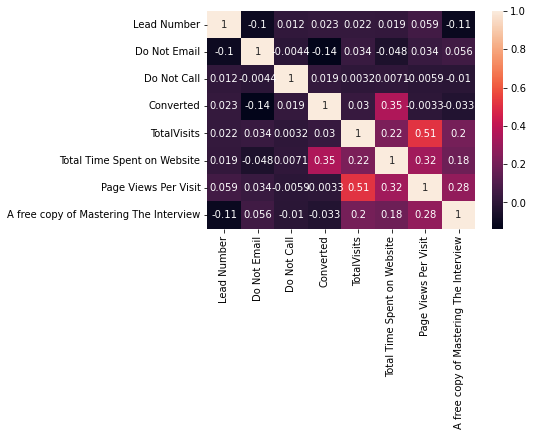

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot = True)
plt.show()

###### Visualising Numeric Variables

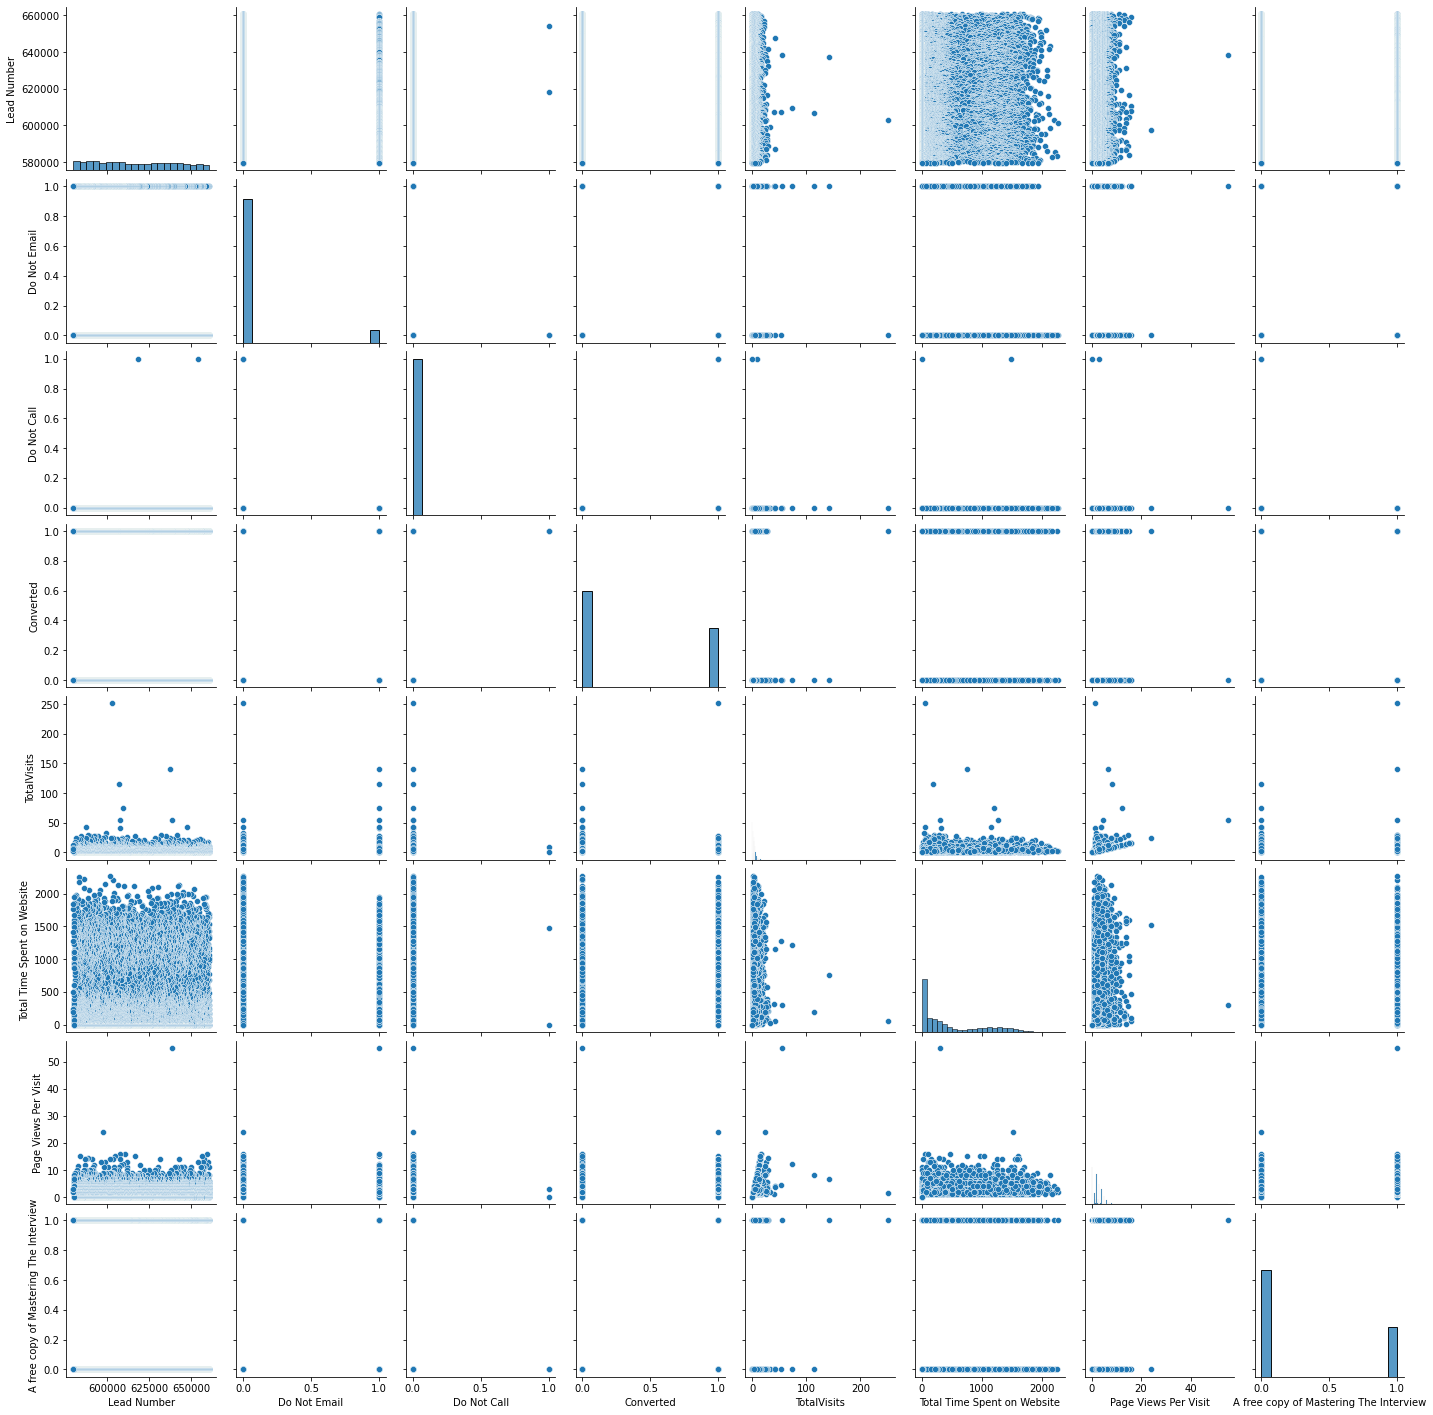

In [54]:
sns.pairplot(df)
plt.show()

###### Visualising Categorical Variables
There are a few categorical variables as well. Let's make a boxplot for some of these variables

###### Grouping low frequencies together in idenitfied Variables for the columns Lead Source, Last Activity, Country, Tags, and What matters most to you in choosing a course

In [55]:
df = df.replace(df[df['Tags'].map(df['Tags'].value_counts() < 20)]['Tags'].unique().tolist(),'Others')
df = df.replace(df[df['Lead Source'].map(df['Lead Source'].value_counts() < 55)]['Lead Source'].unique().tolist(),'Others')
df = df.replace(df[df['Last Activity'].map(df['Last Activity'].value_counts() < 15)]['Last Activity'].unique().tolist(),'Others')
df = df.replace(df[df['Country'].map(df['Country'].value_counts() < 10)]['Country'].unique().tolist(),'Others')
df = df.replace(df[df['What matters most to you in choosing a course'].map(df['What matters most to you in choosing a course'].value_counts() < 20)]['What matters most to you in choosing a course'].unique().tolist(),'Others')

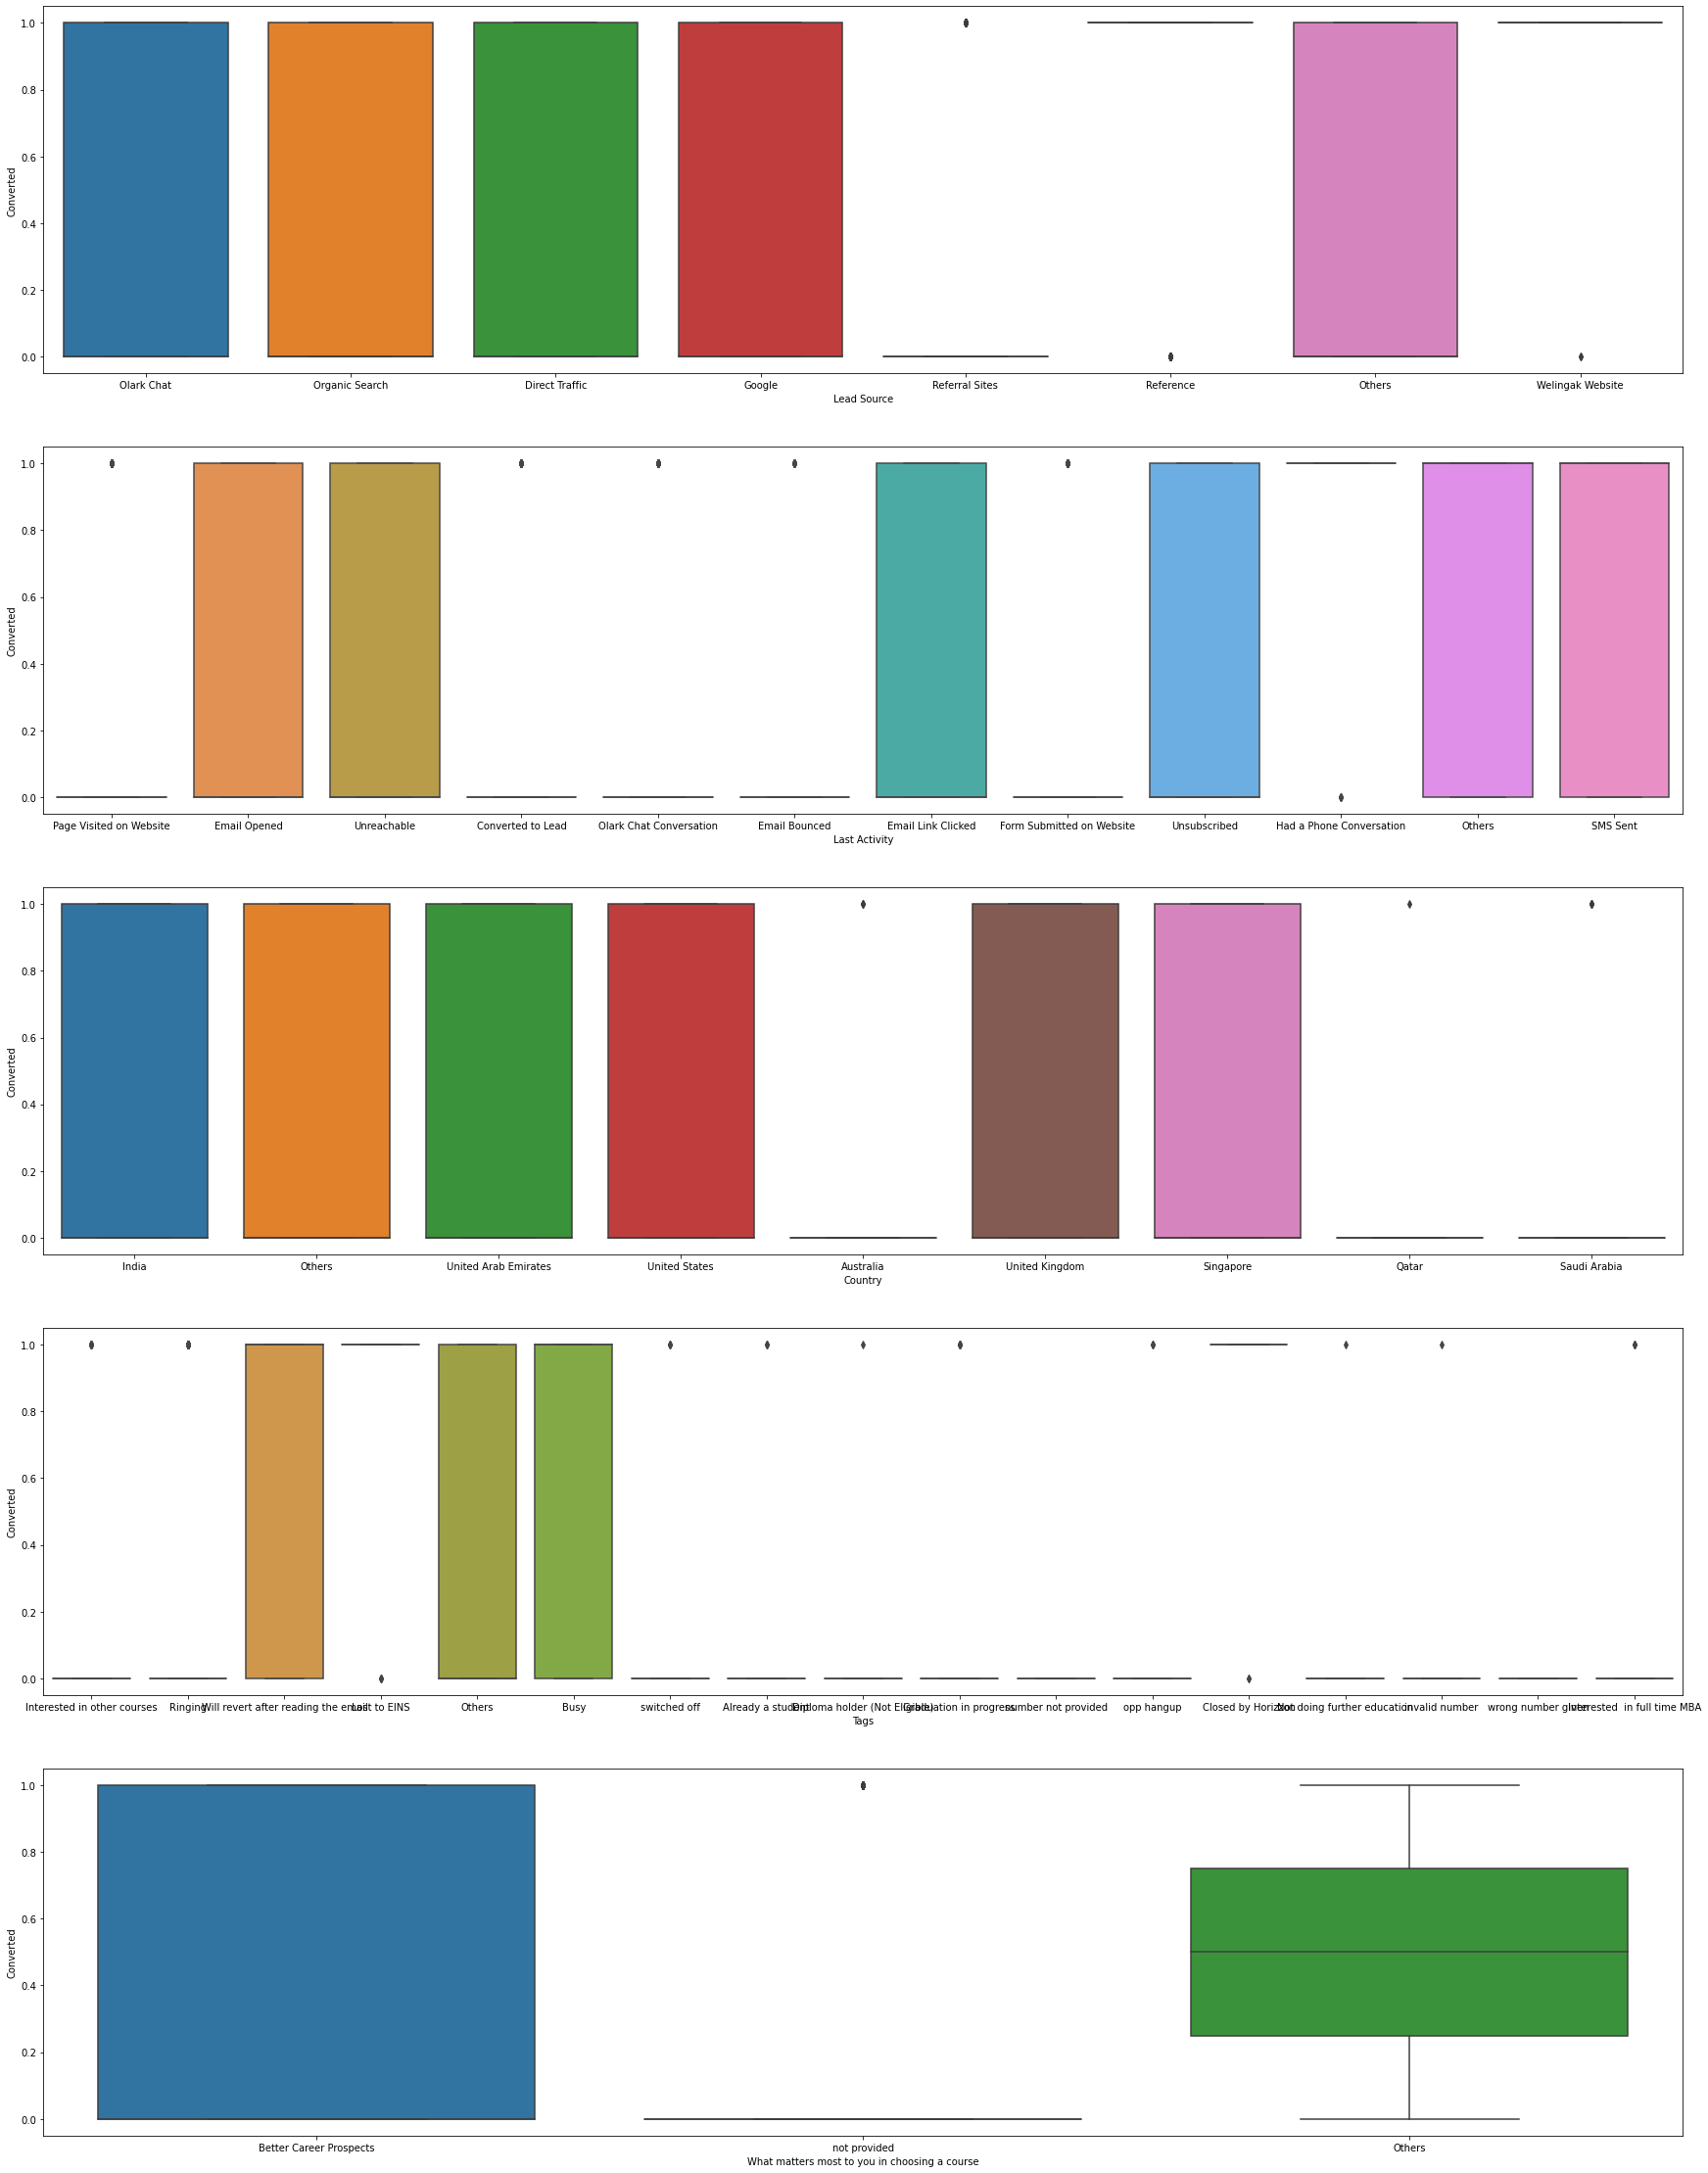

In [56]:
plt.figure(figsize=(30, 40))
plt.subplot(5,1,1)
sns.boxplot(x = 'Lead Source', y = 'Converted', data = df)
plt.subplot(5,1,2)
sns.boxplot(x = 'Last Activity', y = 'Converted', data = df)
plt.subplot(5,1,3)
sns.boxplot(x = 'Country', y = 'Converted', data = df)
plt.subplot(5,1,4)
sns.boxplot(x = 'Tags', y = 'Converted', data = df)
plt.subplot(5,1,5)
sns.boxplot(x = 'What matters most to you in choosing a course', y = 'Converted', data = df)
plt.show()

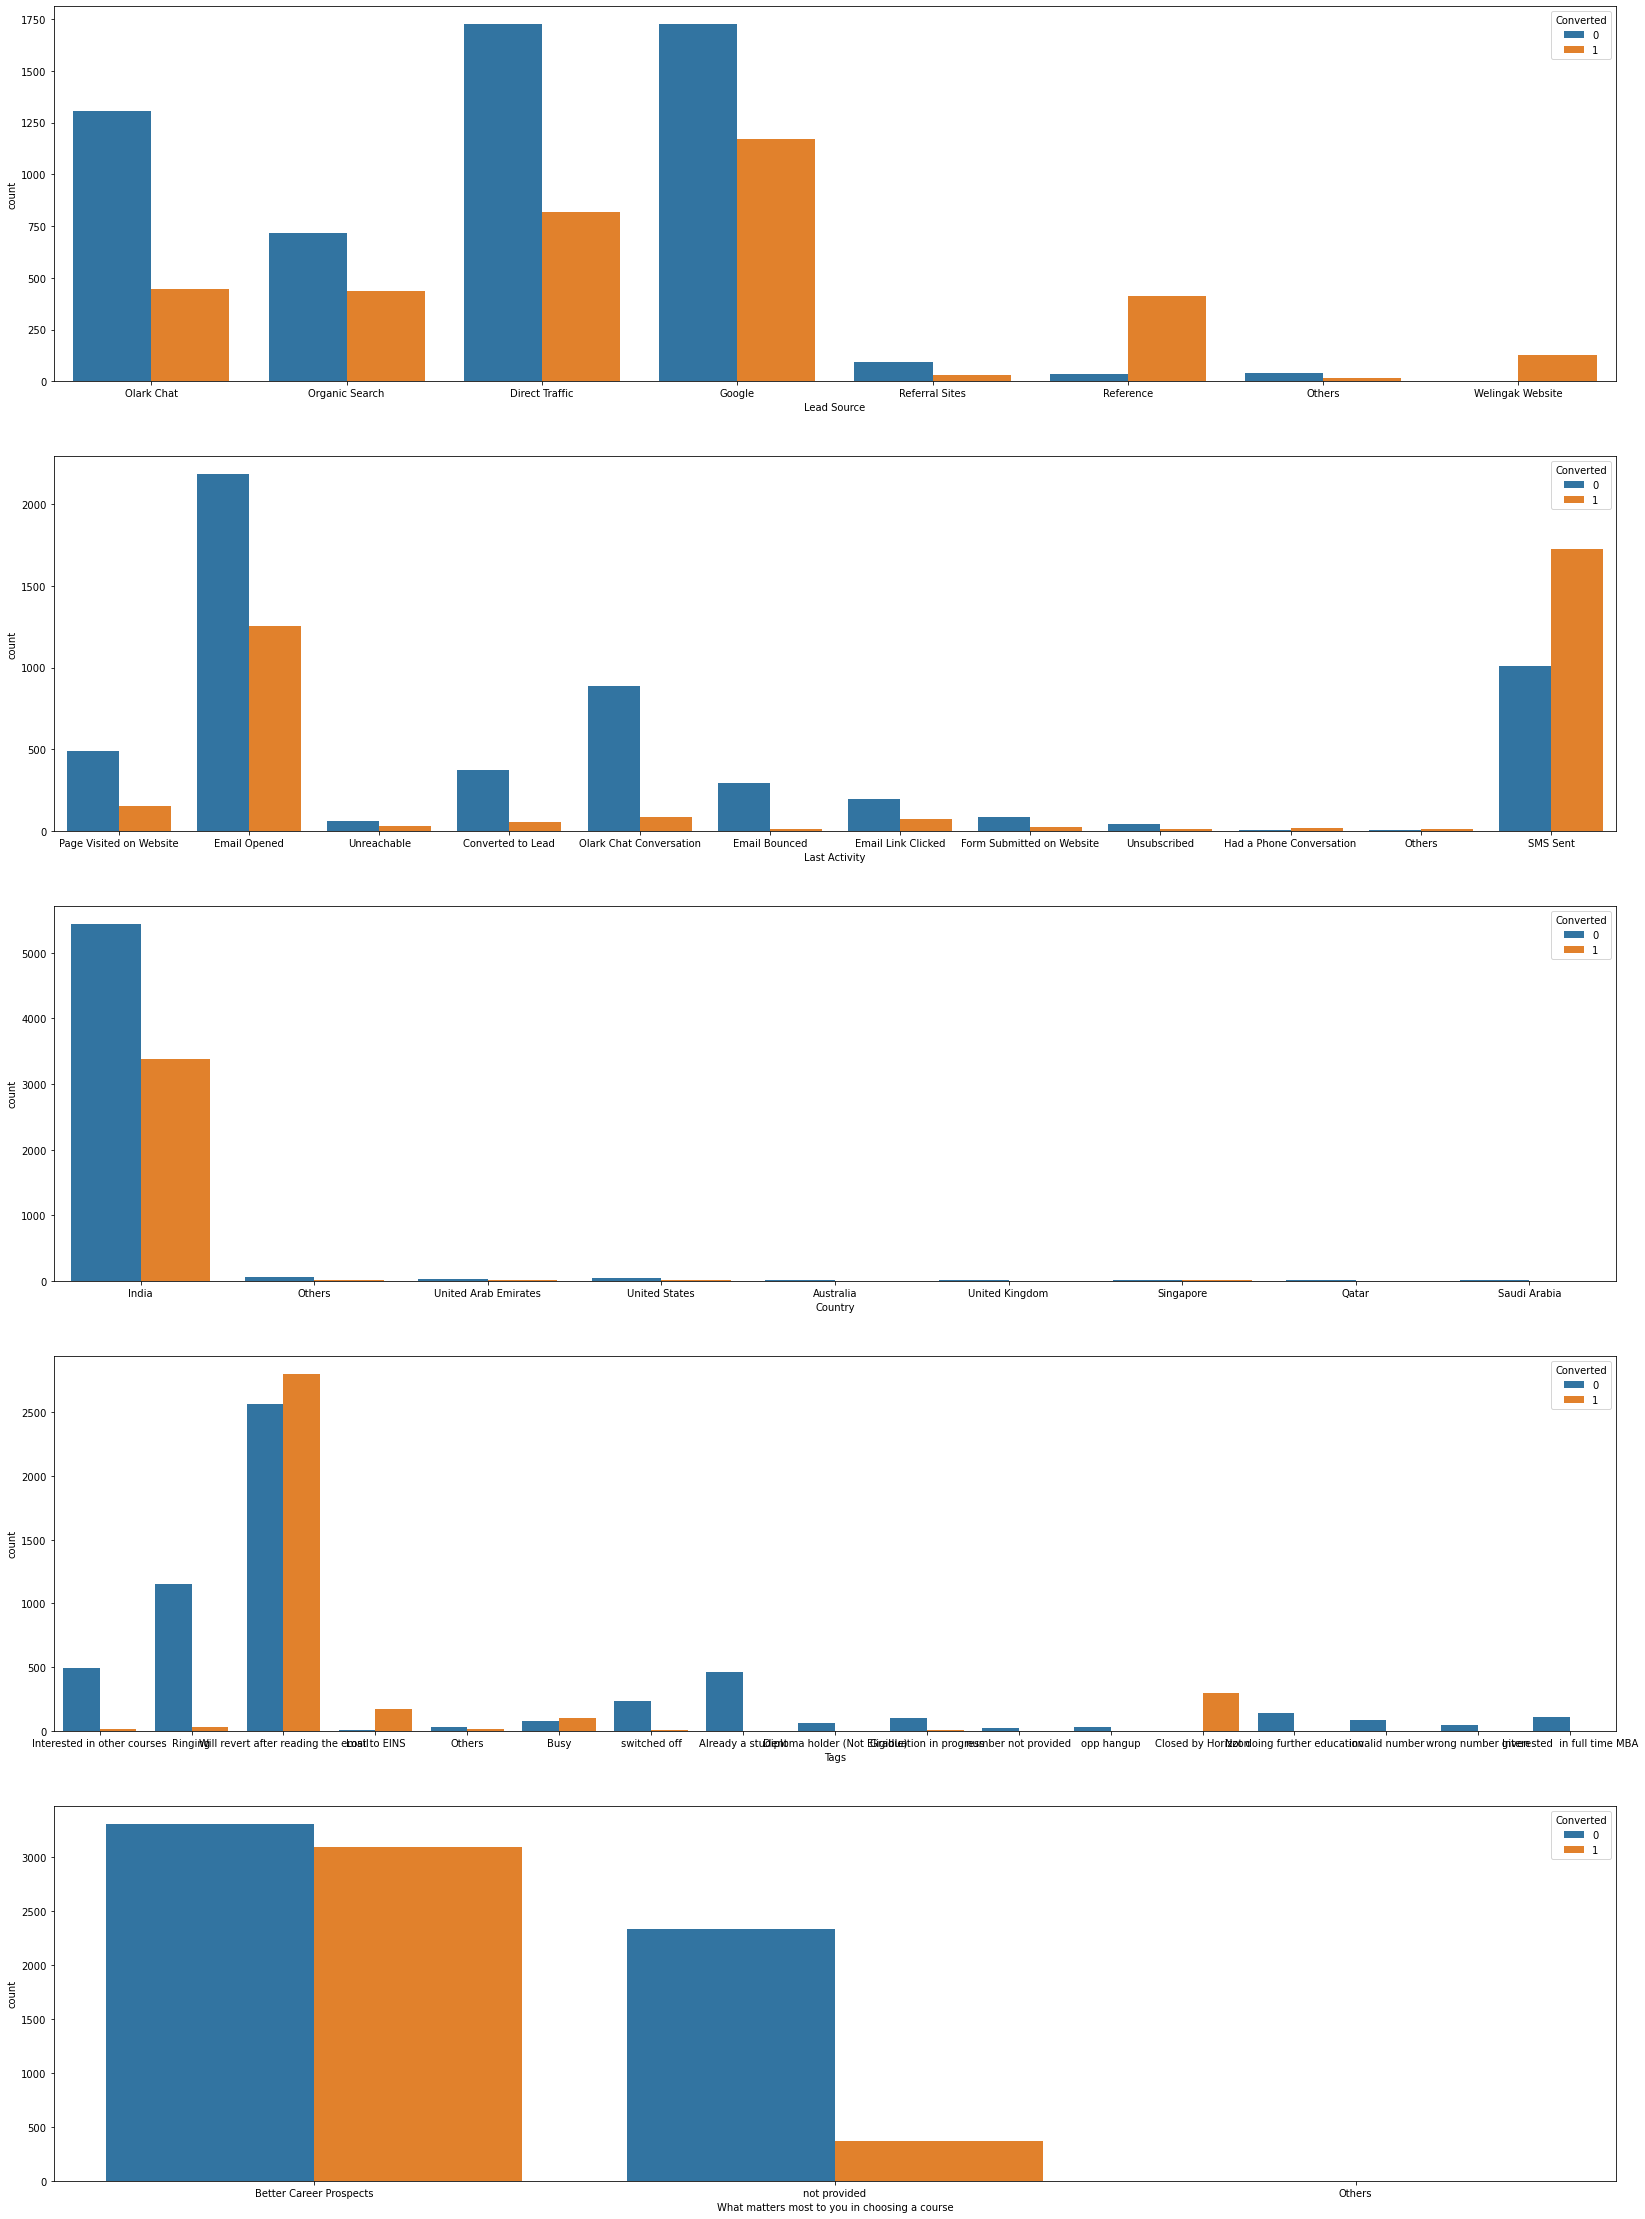

In [57]:
plt.figure(figsize=(28, 40))
plt.subplot(5,1,1)
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df)
plt.subplot(5,1,2)
sns.countplot(x = 'Last Activity', hue = 'Converted', data = df)
plt.subplot(5,1,3)
sns.countplot(x = 'Country', hue = 'Converted', data = df)
plt.subplot(5,1,4)
sns.countplot(x = 'Tags', hue = 'Converted', data = df)
plt.subplot(5,1,5)
sns.countplot(x = 'What matters most to you in choosing a course', hue = 'Converted', data = df)
plt.show()

In [58]:
df.columns

Index(['Lead Number', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview'],
      dtype='object')

###### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [59]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Source','Last Activity', 'Country',
       'What matters most to you in choosing a course', 'Tags',
       ]], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

#Dropping the repeated variables
df.drop(['Lead Source','Last Activity', 'Country',
       'What matters most to you in choosing a course', 'Tags',
       ], axis=1,inplace=True)
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,What matters most to you in choosing a course_Others,What matters most to you in choosing a course_not provided,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,660737,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [60]:
df.shape

(9103, 52)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Lead Number                                                 9103 non-null   int64  
 1   Do Not Email                                                9103 non-null   int64  
 2   Do Not Call                                                 9103 non-null   int64  
 3   Converted                                                   9103 non-null   int64  
 4   TotalVisits                                                 9103 non-null   float64
 5   Total Time Spent on Website                                 9103 non-null   int64  
 6   Page Views Per Visit                                        9103 non-null   float64
 7   A free copy of Mastering The Interview                      9103 non-null   int64  
 8 

###### Checking for Outliers

In [62]:
# Checking for outliers in the continuous variables
df[[ 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


<AxesSubplot:xlabel='Page Views Per Visit'>

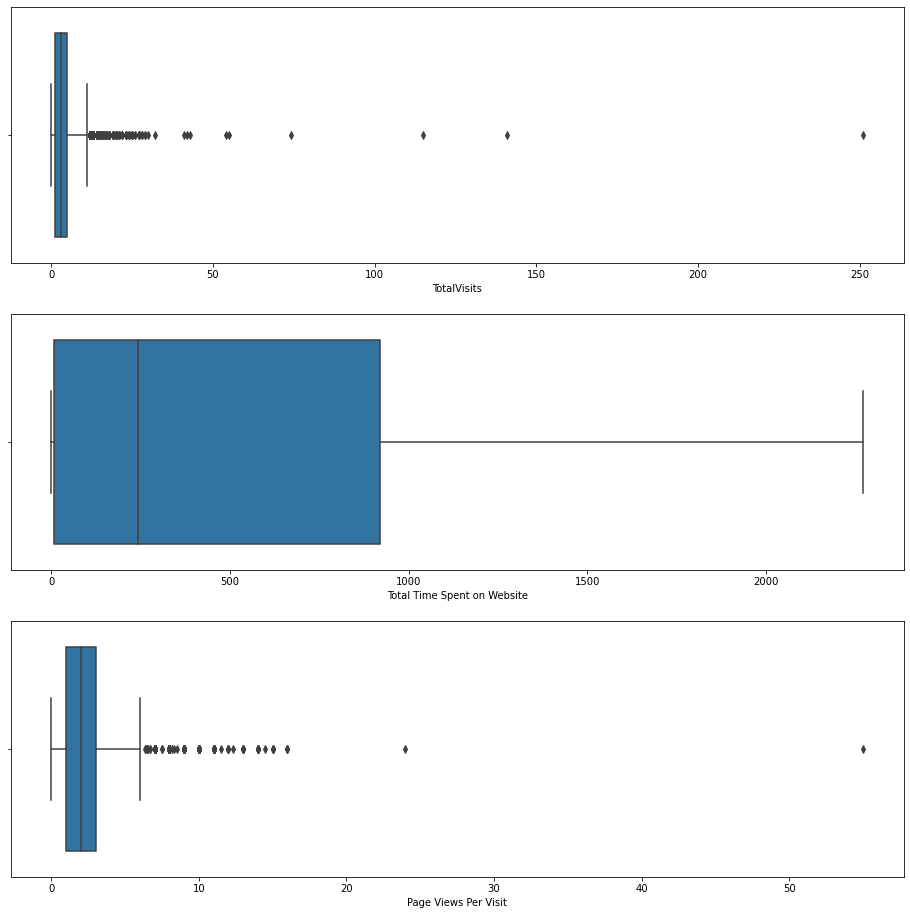

In [63]:
plt.figure(figsize=(16, 16))

plt.subplot(3,1,1)
sns.boxplot(x=df['TotalVisits'])
plt.subplot(3,1,2)
sns.boxplot(x=df['Total Time Spent on Website'])
plt.subplot(3,1,3)
sns.boxplot(x=df['Page Views Per Visit'])


In [64]:
df.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Country_India', 'Country_Others', 'Country_Qatar',
       'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'C

###### Treating the outliers in the columns  'TotalVisits' 

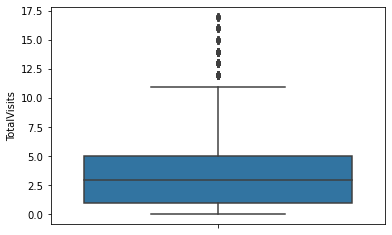

In [65]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [66]:
df.isnull().sum().sum()

0

### Test-Train Split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,What matters most to you in choosing a course_Others,What matters most to you in choosing a course_not provided,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,660737,0,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [69]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling/ Normalization

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,What matters most to you in choosing a course_Others,What matters most to you in choosing a course_not provided,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
2873,632155,0,0,0.271781,0.031598,0.814423,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6823,597388,0,0,1.276480,2.389158,2.274024,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7258,593827,0,0,-1.067817,-0.874028,-1.131710,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8327,586308,0,0,1.611379,1.982176,0.167334,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5940,604266,1,0,-0.732918,-0.701703,-0.645177,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [73]:
### Checking the Conversion Rate
Conversion_Rate = (sum(df['Converted'])/len(df['Converted'].index))*100
Conversion_Rate

37.971175166297115

###### We have almost 38% Conversion Rate

### Looking at Correlations

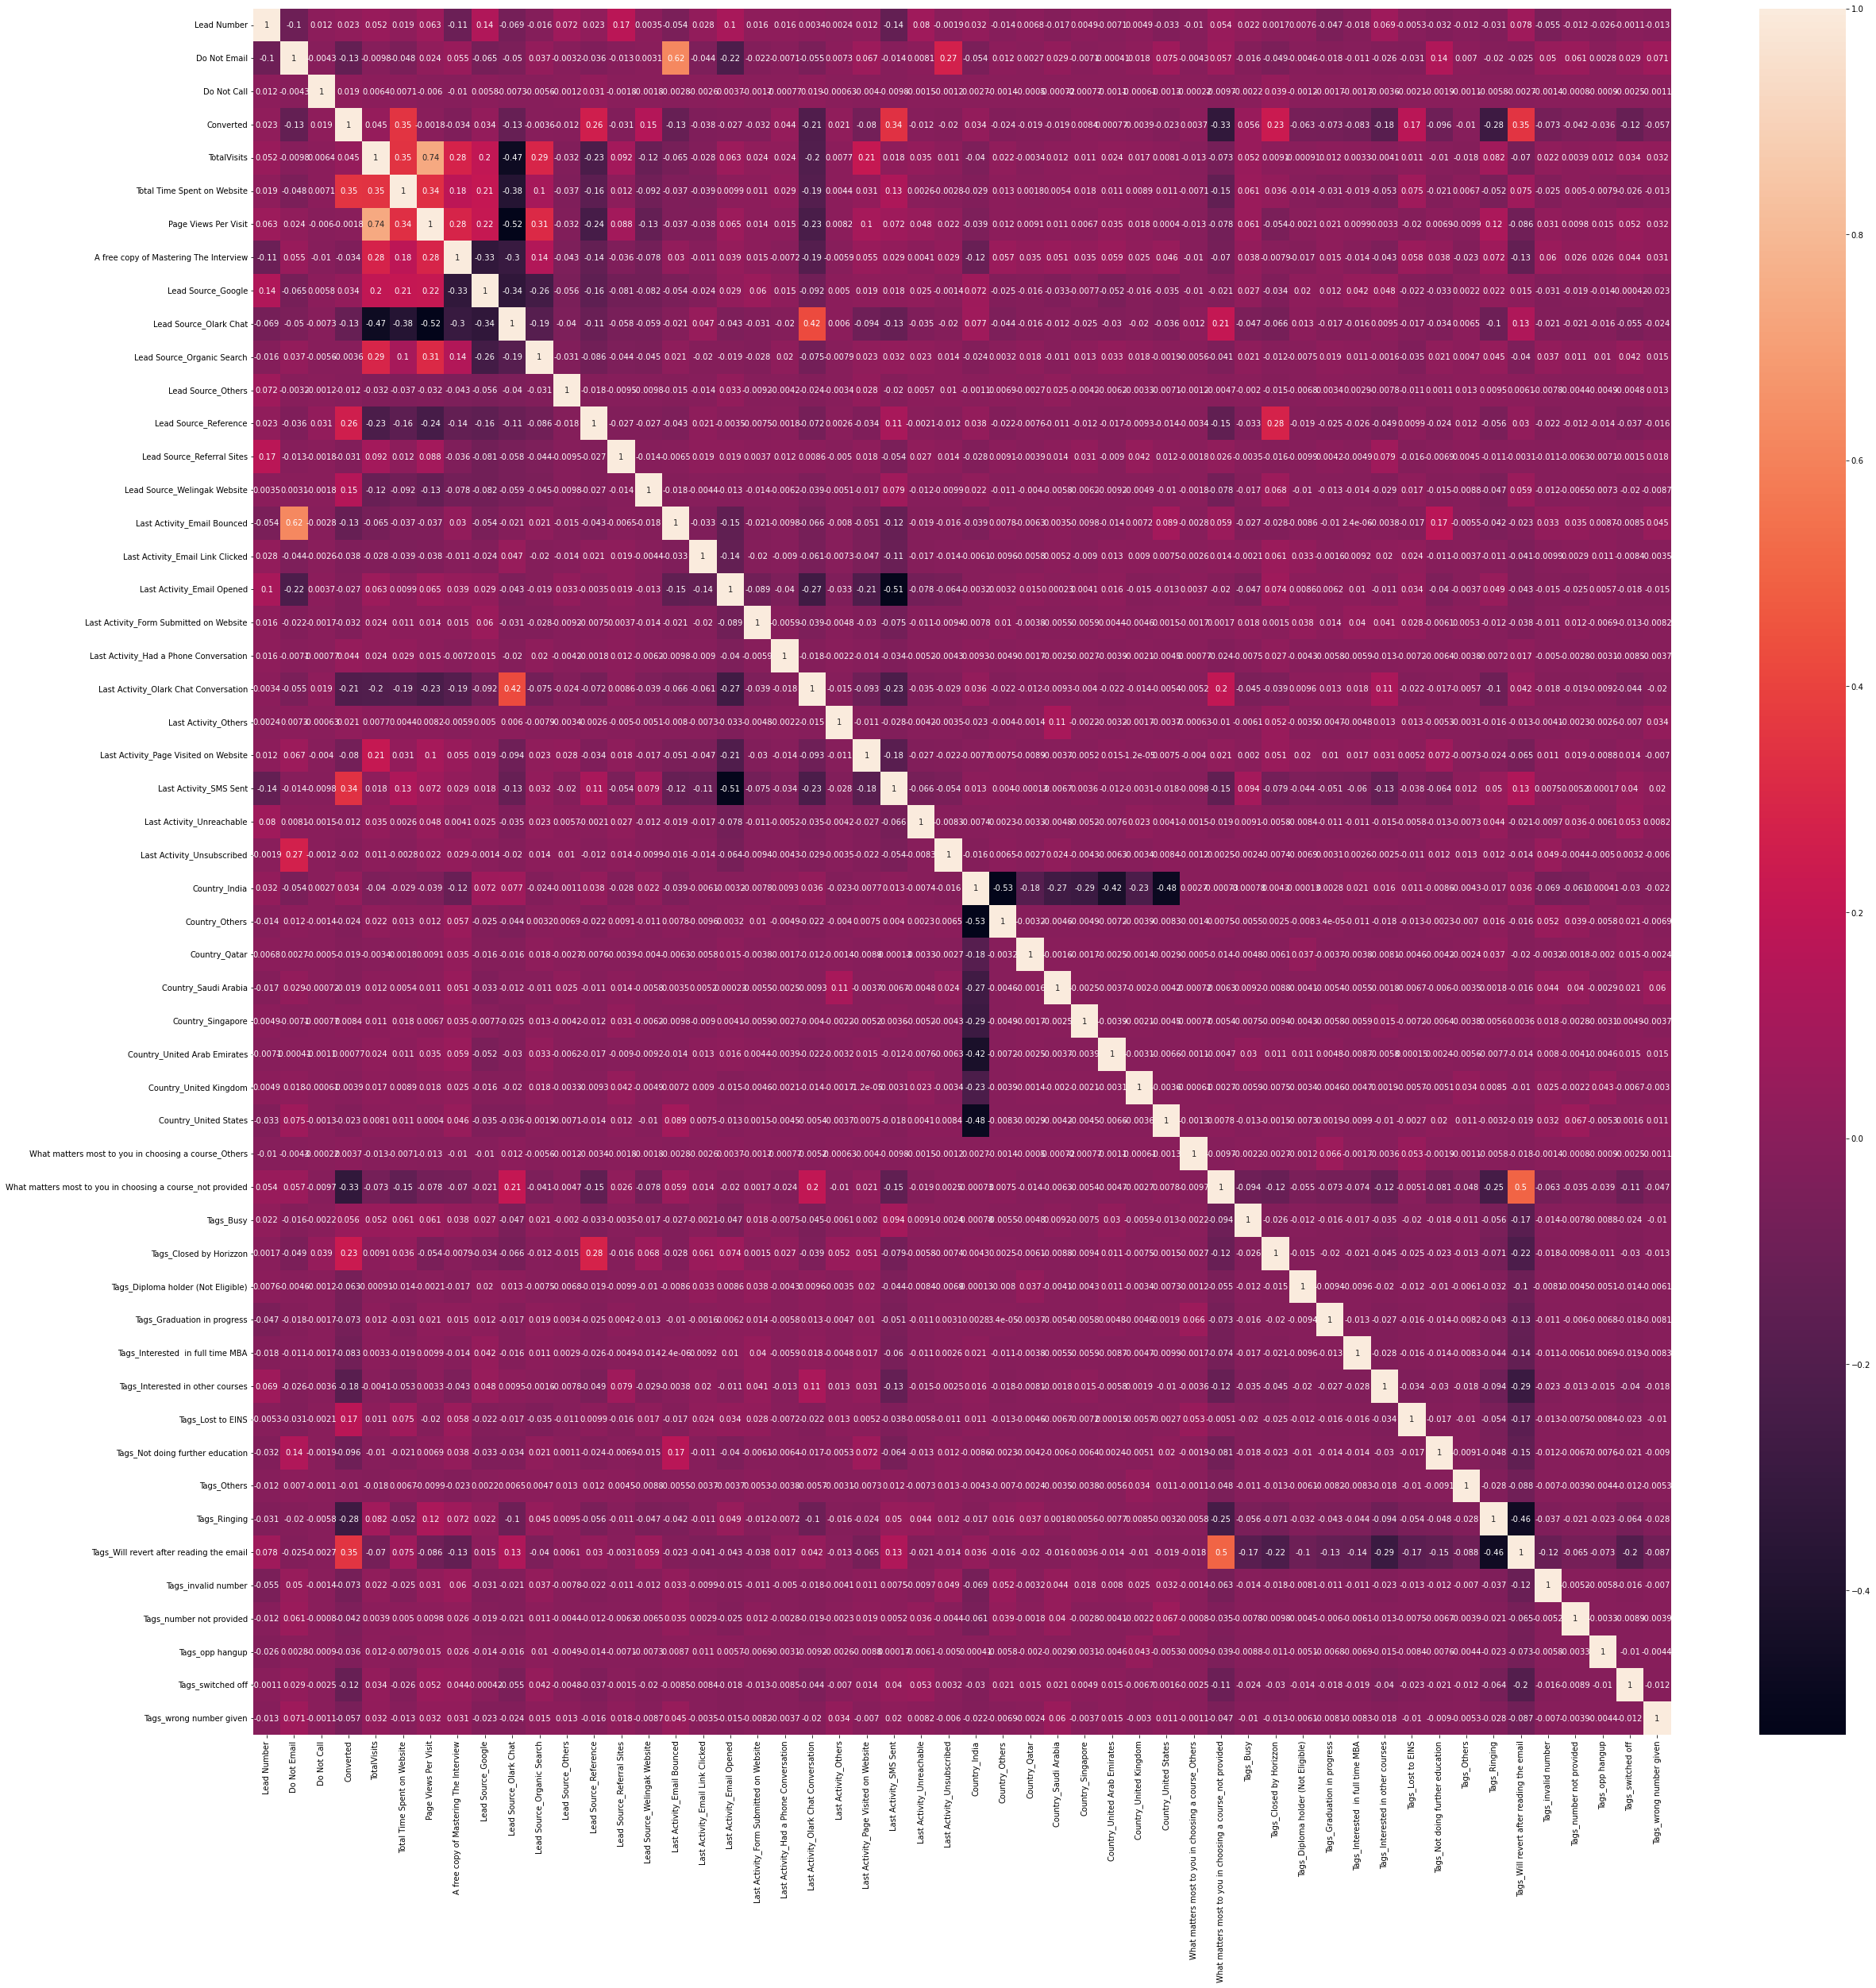

In [74]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,40))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [75]:
df.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,What matters most to you in choosing a course_Others,What matters most to you in choosing a course_not provided,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
Lead Number,1.000000,-0.100403,0.012162,0.023217,0.051846,0.018801,0.063190,-0.107292,0.139872,-0.068578,-0.015961,0.072003,0.023268,0.174833,0.003540,-0.054100,0.027707,0.104848,0.015725,0.016327,0.003357,0.002449,0.011988,-0.137762,0.079734,-0.001926,0.031717,-0.013827,0.006778,-0.017319,0.004854,-0.007124,0.004893,-0.032501,-0.009957,0.053674,0.021549,0.001710,0.007564,-0.046598,-0.018436,0.069070,-0.005314,-0.032466,-0.012421,-0.030882,0.078417,-0.055349,-0.011605,-0.026202,-0.001117,-0.013402
Do Not Email,-0.100403,1.000000,-0.004343,-0.134678,-0.009842,-0.048026,0.024050,0.054751,-0.065179,-0.050315,0.037229,-0.003196,-0.035626,-0.012950,0.003088,0.623117,-0.043521,-0.219981,-0.022111,-0.007056,-0.054630,0.007312,0.067457,-0.013797,0.008075,0.267848,-0.053714,0.011592,0.002680,0.028706,-0.007056,-0.000413,0.018468,0.074726,-0.004343,0.057481,-0.016008,-0.048680,-0.004646,-0.017586,-0.011321,-0.026281,-0.031466,0.135042,0.007017,-0.019550,-0.024644,0.049655,0.061261,0.002824,0.028937,0.070562
Do Not Call,0.012162,-0.004343,1.000000,0.019034,0.006440,0.007143,-0.006046,-0.010088,0.005777,-0.007309,-0.005622,-0.001208,0.031113,-0.001751,-0.001794,-0.002814,-0.002596,0.003727,-0.001692,-0.000769,0.018866,-0.000628,-0.003982,-0.009790,-0.001495,-0.001229,0.002685,-0.001418,-0.000496,-0.000719,-0.000769,-0.001134,-0.000608,-0.001298,-0.000222,-0.009690,-0.002155,0.039348,-0.001249,-0.001662,-0.001700,-0.003631,-0.002070,-0.001856,-0.001089,-0.005758,-0.002736,-0.001435,-0.000801,-0.000902,-0.002457,-0.001078
Converted,0.023217,-0.134678,0.019034,1.000000,0.045007,0.354321,-0.001840,-0.033574,0.034210,-0.125836,-0.003578,-0.012477,0.255206,-0.030933,0.150105,-0.127819,-0.037813,-0.026711,-0.031900,0.043844,-0.211127,0.021306,-0.080170,0.340112,-0.011892,-0.019964,0.033800,-0.023626,-0.019201,-0.018836,0.008368,0.000769,-0.003900,-0.023294,0.003691,-0.325199,0.056012,0.231197,-0.062874,-0.072828,-0.083221,-0.178826,0.170972,-0.095664,-0.010130,-0.279410,0.351662,-0.073008,-0.042067,-0.036060,-0.123390,-0.056625
TotalVisits,0.051846,-0.009842,0.006440,0.045007,1.000000,0.349010,0.740436,0.281875,0.195919,-0.472337,0.291012,-0.031836,-0.225954,0.091611,-0.120453,-0.064701,-0.027629,0.063156,0.023861,0.023776,-0.204402,0.007656,0.212664,0.017819,0.034834,0.011480,-0.039965,0.022103,-0.003421,0.012043,0.010820,0.023625,0.017195,0.008113,-0.013483,-0.072866,0.052245,0.009126,-0.000908,0.011780,0.003288,-0.004147,0.011312,-0.010139,-0.017805,0.081820,-0.070287,0.022065,0.003886,0.011773,0.034291,0.031556
Total Time Spent on Website,0.018801,-0.048026,0.007143,0.354321,0.349010,1.000000,0.336296,0.180465,0.211437,-0.378263,0.101439,-0.036966,-0.162348,0.01

#### From Correlation Table and matrix it is found no variable to have high correlation

### Model Building

In [76]:
import statsmodels.api as sm

In [77]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1174.5
Date:                Mon, 23 Jan 2023   Deviance:                       2349.0
Time:                        22:11:44   Pearson chi2:                 1.27e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6143
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -6.8267      2.200     -3.103      0.002     -11.138      -2.515
Lead Number                                                -1.801e-06    2.5e-06     -0.720      0.471    -6.7e-06     3.1e-06
Do Not Email                                                  -1.0121      0.309     -3.273      0.001      -1.618      -0.406
Do Not Call                                                   20.5239   9.04e+04      0.000      1.000   -1.77e+05    1.77e+05
TotalVisits                                                    0.2722      0.084      3.237      0.001       0.107       0.437
Total Time Spent on Website                                    1.0556      0.064     16.584      0.000       0.931       1.180
Page Views Per Visit                                          -0.1511      0.087     -1.737      0.082      -0.322       0.019
A free copy of Mastering The Interview                        -0.1375      0.164     -0.839      0.401      -0.459       0.184
Lead Source_Google                                             0.1156      0.183      0.633      0.526      -0.242       0.473
Lead Source_Olark Chat                                         0.9890      0.236      4.184      0.000       0.526       1.452
Lead Source_Organic Search                                     0.1267      0.197      0.644      0.520      -0.259       0.512
Lead Source_Others                                             0.2638      0.564      0.468      0.640      -0.841       1.368
Lead Source_Reference                                          2.1913      0.409      5.359      0.000       1.390       2.993
Lead Source_Referral Sites                                     0.6559      0.502      1.306      0.191      -0.328       1.640
Lead Source_Welingak Website                                   2.5603      0.755      3.389      0.001       1.080       4.041
Last Activity_Email Bounced                                   -0.2435      0.626     -0.389      0.697      -1.471       0.984
Last Activity_Email Link Clicked                               0.5242      0.462      1.134      0.257      -0.382       1.430
Last Activity_Email Opened                                     1.2135      0.327      3.711      0.000       0.573       1.854
Last Activity_Form Submitted on Website                        0.3533      0.599      0.590      0.555      -0.820       1.527
Last Activity_Had a Phone Conversation                         3.4384      1.239      2.775      0.006       1.010       5.867
Last Activity_Olark Chat Conversation                         -0.6183      0.386     -1.602      0.109      -1.375       0.138
Last Activity_Others               

###### Here, we use the GLM (Generalized Linear Models) method of the library statsmodels. 'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes, here 'Converted' and 'Not-Converted')

### Feature Selection Using RFE

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=19)             # running RFE with 19 variables as output
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([ True,  True, False,  True,  True, False,  True, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False, False, False, False, False])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 28),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Welingak Website', False, 3),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 9),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Had a Phone Conversation', False, 19),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 33),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 21),
 (

In [82]:
col = X_train.columns[rfe.support_]

In [83]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Page Views Per Visit', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Country_Others', 'Country_Qatar', 'Country_Saudi Arabia',
       'Country_Singapore', 'Country_United Arab Emirates',
       'Country_United Kingdom', 'Country_United States',
       'What matters most to you in choosing a course_Others', 'Tags_Busy',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Not doing further education',
       'Tags_Others', 'Tags_invalid number', 'Tags_number not provided',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given'],
      dt

###### Assessing the model with StatsModels

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.1
Date:                Mon, 23 Jan 2023   Deviance:                       2584.1
Time:                        22:11:46   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5996
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -4.2111      1.479     -2.847      0.004      -7.111      -1.312
Lead Number                                                 1.442e-06   2.32e-06      0.621      0.535   -3.11e-06    5.99e-06
Do Not Email                                                  -0.8185      0.257     -3.186      0.001      -1.322      -0.315
TotalVisits                                                    0.1671      0.063      2.674      0.007       0.045       0.290
Total Time Spent on Website                                    0.9901      0.058     17.061      0.000       0.876       1.104
A free copy of Mastering The Interview                        -0.2890      0.121     -2.381      0.017      -0.527      -0.051
Lead Source_Olark Chat                                         0.7849      0.174      4.518      0.000       0.444       1.125
Lead Source_Reference                                          2.0612      0.384      5.361      0.000       1.308       2.815
Last Activity_Email Bounced                                   -1.2109      0.535     -2.263      0.024      -2.259      -0.162
Last Activity_Email Opened                                     0.5348      0.195      2.749      0.006       0.153       0.916
Last Activity_Olark Chat Conversation                         -1.3044      0.281     -4.643      0.000      -1.855      -0.754
Last Activity_Page Visited on Website                         -0.0802      0.297     -0.270      0.787      -0.662       0.501
Last Activity_SMS Sent                                         2.4728      0.199     12.398      0.000       2.082       2.864
Country_India                                                 -0.1915      0.294     -0.652      0.515      -0.767       0.385
What matters most to you in choosing a course_not provided    -4.1270      0.133    -30.945      0.000      -4.388      -3.866
Tags_Closed by Horizzon                                        8.2118      1.037      7.921      0.000       6.180      10.244
Tags_Interested in other courses                              -0.8927      0.392     -2.275      0.023      -1.662      -0.124
Tags_Lost to EINS                                              9.5013      0.713     13.333      0.000       8.105      10.898
Tags_Ringing                                                  -1.9899      0.256     -7.768      0.000      -2.492      -1.488
Tags_Will revert after reading the email                       4.6215      0.163     28.401      0.000       4.303       4.940
==============================================================================================================================
"""

In [85]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2873    0.995190
6823    0.997108
7258    0.009802
8327    0.845885
5940    0.002082
5686    0.995203
5372    0.999232
4736    0.019256
5812    0.998042
893     0.070637
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99518983, 0.99710794, 0.00980223, 0.84588514, 0.00208177,
       0.99520312, 0.99923221, 0.01925639, 0.9980424 , 0.07063729])

##### Creating a dataframe with the actual Conversion  and the predicted probabilities

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,1,0.995190,2873
1,1,0.997108,6823
2,0,0.009802,7258
3,1,0.845885,8327
4,0,0.002082,5940


#### Creating new column 'predicted' with 1 if Conversion_Prob > 0.55 else 0

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.55 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,1,0.995190,2873,1
1,1,0.997108,6823,1
2,0,0.009802,7258,0
3,1,0.845885,8327,1
4,0,0.002082,5940,0


In [89]:
from sklearn import metrics

In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3743  194]
 [ 294 2083]]


In [91]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [92]:
# Predicted        not_conversion    conversion
# Actual
# not_conversion         [3743        194]
# conversion            [ 294        2083]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9227114349065568


###### Checking the variance_inflation_factor

In [94]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
X_train[col].shape[1]

19

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,43.44
12,Country_India,32.71
18,Tags_Will revert after reading the email,6.23
8,Last Activity_Email Opened,4.48
11,Last Activity_SMS Sent,3.90
13,What matters most to you in choosing a course_...,2.34
5,Lead Source_Olark Chat,2.28
9,Last Activity_Olark Chat Conversation,2.27
7,Last Activity_Email Bounced,1.90
1,Do Not Email,1.83


###### There are a few variables with high VIF and also some with high P value, so It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Country_India' has the highest VIF. So let's start by dropping that.

In [97]:
col = col.drop('Country_India', 1)
col

Index(['Lead Number', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'A free copy of Mastering The Interview',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_not provided',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [98]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.3
Date:                Mon, 23 Jan 2023   Deviance:                       2584.6
Time:                        22:11:47   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5996
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -4.3701      1.459     -2.995      0.003      -7.230      -1.510
Lead Number                                                 1.412e-06   2.32e-06      0.608      0.543   -3.14e-06    5.96e-06
Do Not Email                                                  -0.8199      0.257     -3.192      0.001      -1.323      -0.316
TotalVisits                                                    0.1673      0.062      2.677      0.007       0.045       0.290
Total Time Spent on Website                                    0.9903      0.058     17.061      0.000       0.877       1.104
A free copy of Mastering The Interview                        -0.2832      0.121     -2.340      0.019      -0.520      -0.046
Lead Source_Olark Chat                                         0.7808      0.174      4.498      0.000       0.441       1.121
Lead Source_Reference                                          2.0574      0.384      5.353      0.000       1.304       2.811
Last Activity_Email Bounced                                   -1.2083      0.535     -2.258      0.024      -2.257      -0.159
Last Activity_Email Opened                                     0.5289      0.194      2.723      0.006       0.148       0.910
Last Activity_Olark Chat Conversation                         -1.3119      0.281     -4.675      0.000      -1.862      -0.762
Last Activity_Page Visited on Website                         -0.0874      0.296     -0.295      0.768      -0.669       0.494
Last Activity_SMS Sent                                         2.4666      0.199     12.391      0.000       2.076       2.857
What matters most to you in choosing a course_not provided    -4.1251      0.133    -30.944      0.000      -4.386      -3.864
Tags_Closed by Horizzon                                        8.2059      1.036      7.919      0.000       6.175      10.237
Tags_Interested in other courses                              -0.8997      0.392     -2.293      0.022      -1.669      -0.131
Tags_Lost to EINS                                              9.4908      0.713     13.317      0.000       8.094      10.888
Tags_Ringing                                                  -1.9926      0.256     -7.781      0.000      -2.495      -1.491
Tags_Will revert after reading the email                       4.6168      0.162     28.417      0.000       4.298       4.935
==============================================================================================================================
"""

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,13.96
17,Tags_Will revert after reading the email,6.23
8,Last Activity_Email Opened,4.47
11,Last Activity_SMS Sent,3.88
12,What matters most to you in choosing a course_...,2.34
5,Lead Source_Olark Chat,2.27
9,Last Activity_Olark Chat Conversation,2.27
7,Last Activity_Email Bounced,1.90
1,Do Not Email,1.83
16,Tags_Ringing,1.82


###### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [100]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [101]:
y_train_pred[:10]

array([0.99519722, 0.99713648, 0.00980145, 0.84704376, 0.00212009,
       0.9952201 , 0.9992333 , 0.01932898, 0.99803889, 0.07103767])

In [102]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [103]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.55 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,1,0.995197,2873,1
1,1,0.997136,6823,1
2,0,0.009801,7258,0
3,1,0.847044,8327,1
4,0,0.002120,5940,0


In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9228698131137155


###### The accuracy is still almost the same.

In [105]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3743,  194],
       [ 293, 2084]], dtype=int64)

In [106]:
# Actual/Predicted     not_conversion    conversion
# not_conversion              [3743,     194],
# conversion                  [ 293,     2084]

### Metrics beyond simply accuracy

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives  
FP = confusion[0,1] # false positives  -+
FN = confusion[1,0] # false negatives  +-

In [108]:
FN

293

In [109]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8767353807320152

In [110]:
# Let us calculate specificity
TN / float(TN+FP)

0.9507239014478029

In [111]:
# Calculate false postive rate - predicting Conversion when Leads not not have converted
print(FP/ float(TN+FP))

0.049276098552197105


In [112]:
# positive predictive value 
print (TP / float(TP+FP))

0.9148375768217735


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9274033696729435


### Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

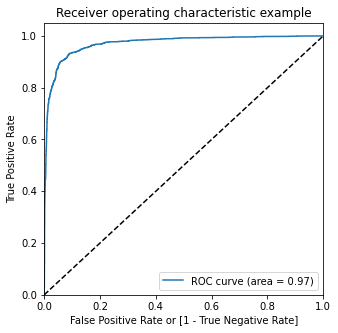

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

###  Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [117]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [118]:
y_train_pred_final.Conversion_Prob

0       0.995197
1       0.997136
2       0.009801
3       0.847044
4       0.002120
          ...   
6309    0.010699
6310    0.713944
6311    0.206602
6312    0.694906
6313    0.992580
Name: Conversion_Prob, Length: 6314, dtype: float64

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.995197,2873,1,1,1,1,1,1,1,1,1,1,1
1,1,0.997136,6823,1,1,1,1,1,1,1,1,1,1,1
2,0,0.009801,7258,0,1,0,0,0,0,0,0,0,0,0
3,1,0.847044,8327,1,1,1,1,1,1,1,1,1,1,0
4,0,0.002120,5940,0,1,0,0,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376465  1.000000  0.000000
0.1   0.1  0.858727  0.970551  0.791212
0.2   0.2  0.898163  0.948254  0.867920
0.3   0.3  0.917960  0.927219  0.912370
0.4   0.4  0.925404  0.901136  0.940056
0.5   0.5  0.925562  0.888515  0.947930
0.6   0.6  0.922395  0.867059  0.955804
0.7   0.7  0.912100  0.824148  0.965202
0.8   0.8  0.898638  0.762726  0.980696
0.9   0.9  0.875990  0.689104  0.988824


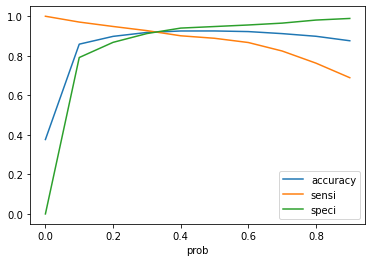

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.show()

### From the curve above, 0.375 is the optimum point to take it as a cutoff probability.

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.375 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.995197,2873,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.997136,6823,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.009801,7258,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.847044,8327,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.002120,5940,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9223946784922394

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3669,  268],
       [ 222, 2155]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9066049642406394

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.9319278638557277

In [128]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0680721361442723


In [129]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8893933140734627


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9429452582883577


### Precision and Recall

In [131]:
#Looking at the confusion matrix again

In [132]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3669,  268],
       [ 222, 2155]], dtype=int64)

##### Precision
TP / TP + FP

In [133]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8893933140734627

##### Recall
TP / TP + FN

In [134]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9066049642406394

###### Using sklearn utilities for the same

In [135]:
from sklearn.metrics import precision_score, recall_score

In [136]:
?precision_score 

In [137]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8893933140734627

In [138]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9066049642406394

##### Precision and recall tradeoff

In [139]:
from sklearn.metrics import precision_recall_curve

In [140]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 6309    0
 6310    1
 6311    0
 6312    1
 6313    1
 Name: Converted, Length: 6314, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       0
        ..
 6309    0
 6310    1
 6311    0
 6312    1
 6313    1
 Name: final_predicted, Length: 6314, dtype: int64)

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

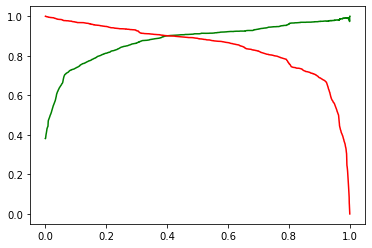

In [142]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Making predictions on the test set

In [143]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [144]:
X_test = X_test[col]
X_test.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What matters most to you in choosing a course_not provided,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email
5130,610648,1,-1.067817,-0.874028,0,1,0,1,0,0,0,0,1,0,0,0,0,1
6929,596485,0,0.606681,-0.820864,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1484,644624,1,0.271781,-0.644872,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6519,599852,0,-0.398018,2.024341,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7472,592334,0,-0.398018,1.666857,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [145]:
X_test_sm = sm.add_constant(X_test)

###### Making predictions on the test set

In [146]:
y_test_pred = res.predict(X_test_sm)

In [147]:
y_test_pred[:10]

5130    0.004928
6929    0.712213
1484    0.012139
6519    0.247636
7472    0.992235
7920    0.036841
3962    0.010196
6135    0.009924
8701    0.835655
5461    0.991351
dtype: float64

In [148]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [149]:
# Let's see the head
y_pred_1.head()

,0
5130,0.004928
6929,0.712213
1484,0.012139
6519,0.247636
7472,0.992235


In [150]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [151]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [152]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [154]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,5130,0.004928
1,0,6929,0.712213
2,0,1484,0.012139
3,0,6519,0.247636
4,1,7472,0.992235


In [155]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [156]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'],axis=1)

In [157]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,5130,0,0.004928
1,6929,0,0.712213
2,1484,0,0.012139
3,6519,0,0.247636
4,7472,1,0.992235


In [158]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [159]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted
0,5130,0,0.004928,0
1,6929,0,0.712213,1
2,1484,0,0.012139,0
3,6519,0,0.247636,0
4,7472,1,0.992235,1


### Let's check the overall accuracy

In [160]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9271988174427199

### The overall accuracy of our model comes out to be nearly 93 %

In [161]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1557,  101],
       [  96,  952]], dtype=int64)

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9083969465648855

### The sensitivity of our model is nearly 91%

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.9390832328106152

### The specificity of our model is comming to be about 94 %